In [22]:
import anndata as ad
import pandas as pd
import scanpy as sc

import moscot as mt
import squidpy as sq

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [3]:
adata_sp = mt.datasets.drosophila(spatial=True)
adata_sc = mt.datasets.drosophila(spatial=False)

In [27]:
adata_full = ad.concat([adata_sp, adata_sc])
sc.pp.neighbors(adata_full, n_neighbors=30, use_rep="X")
df = pd.DataFrame(
    index=adata_full.obs_names,
    columns=adata_full.obs_names,
    data=adata_full.obsp["connectivities"].A.astype("float64"),
)

mp = mt.problems.MappingProblem(adata_sc=adata_sc, adata_sp=adata_sp)
mp = mp.prepare(
    sc_attr={"attr": "X"},
    joint_attr={"attr": "X"},
)
mp[("src", "tgt")].set_graph_xy(df, cost="geodesic")
mp.solve()

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Normalizing spatial coordinates of `x`.                                                                   
WARNING  Densifying data in `adata.X`                                                                              
WARNING  Densifying data in `adata.X`                                                                              
WARNING  Densifying data in `adata.X`                                                                              
INFO     Solving `1` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(3039, 1297)].                                          


MappingProblem[('src', 'tgt')]

In [31]:
genes = ["cic", "jigr1", "nuse", "scb", "chrb"]
adata_imputed = mp.impute(var_names=genes)

In [32]:
adata_imputed.obsm["spatial_xy"] = adata_sp.obsm["spatial"][:, [0, 2]]

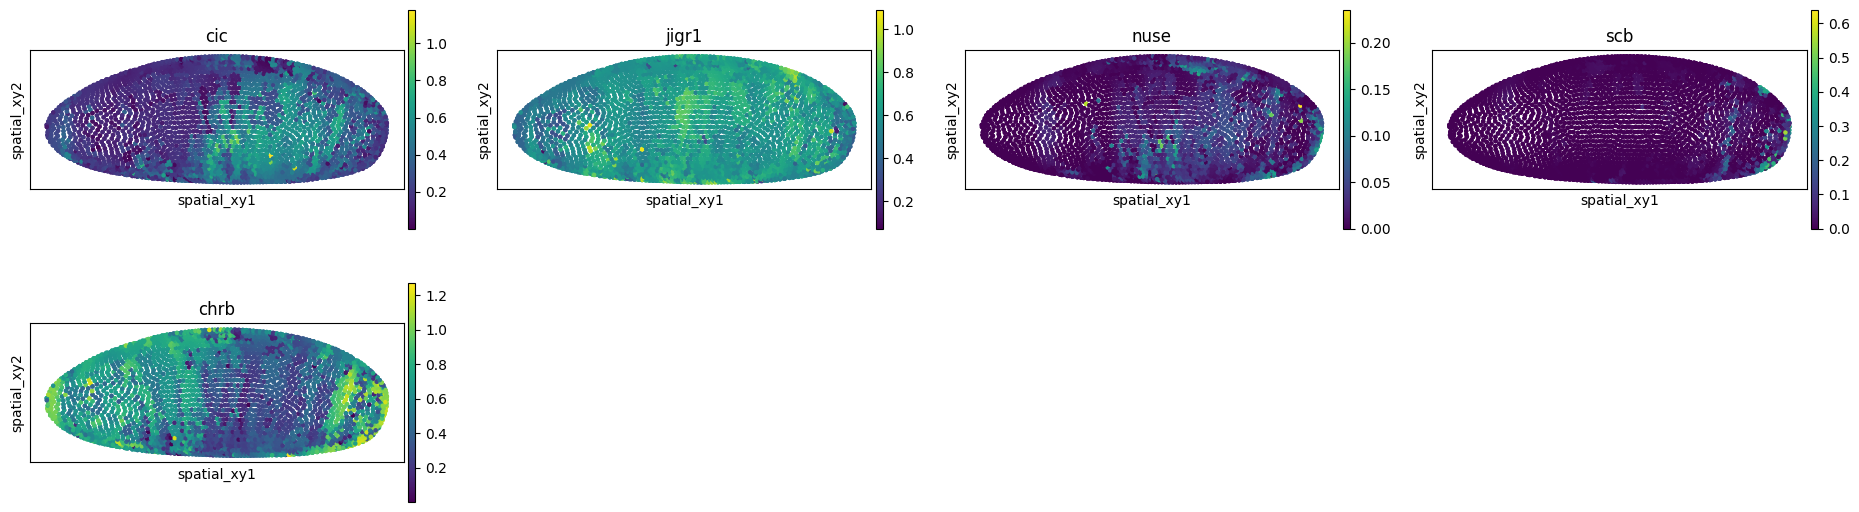

In [33]:
sq.pl.spatial_scatter(
    adata_imputed,
    spatial_key="spatial_xy",
    color=genes,
    shape=None,
    size=20,
    figsize=(5, 3),
)

In [8]:
a = np.random.normal(size=(50, 100))
b = np.random.normal(size=(50, 20))
ind = np.random.choice(["a", "b"], size=(50,))
out = train_test_split(a, b, ind, test_size=0.8)
for i in out:
    print(i.shape)

(10, 100)
(40, 100)
(10, 20)
(40, 20)
(10,)
(40,)


In [2]:
from pathlib import Path

import scanpy as sc

import squidpy as sq

path_data = Path("/lustre/groups/ml01/workspace/moscot_paper/mapping")
adata_spatial = sc.read(path_data / "vizgen_liver/adata_result.h5ad")

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


['default', 'despine']


/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


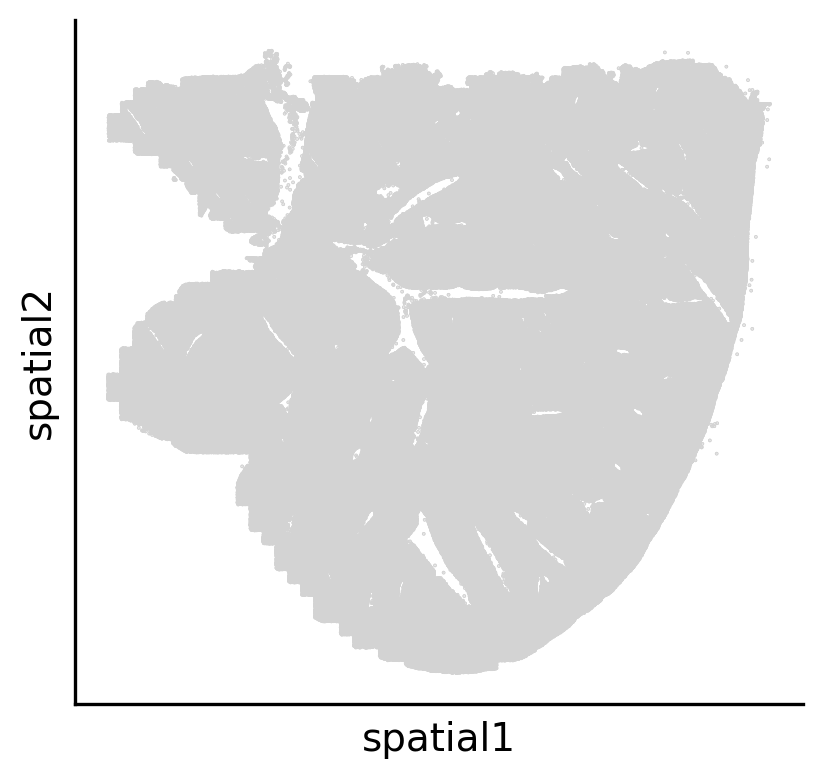

In [4]:
import matplotlib.pyplot as plt
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams["legend.scatterpoints"] = 1

sq.pl.spatial_scatter(adata_spatial, na_color="lightgrey", dpi=200, shape=None)